In [1]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.grid_objs import Grid, Column
import matplotlib.pyplot as plt

import time

py.sign_in('mscandizzo', 'QA6ByvcoBJcWk7H0NAUi')

import centroids as ct

In [3]:
vectores , colores, k = ct.create_sample()

In [4]:
trace = go.Scatter(
    x = vectores[:,0],
    y = vectores[:,1],
    mode = 'markers'
)

data = [trace]

# Plot and embed in ipython notebook!
py.iplot(data, filename='basic-scatter')

trace = go.Scatter(
    x = vectores[:,0],
    y = vectores[:,1],
    mode = 'markers',
    marker = dict(
        color = '#3c00ff',
        size = 8,
        line = dict(width = 1)
    )
)

trace1 = go.Scatter(
    x = centroids[:,0],
    y = centroids[:,1],
    mode = 'markers',
    marker = dict(
        color = '#9a2d25',
        size = 12,
        line = dict(width = 1)
    )
)
data = [trace, trace1]

# Plot and embed in ipython notebook!
py.iplot(data, filename='basic-scatter')

In [2]:
vectores, colores , k = ct.create_sample()

In [3]:
vectores.shape

(300, 2)

C:\Users\maria\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



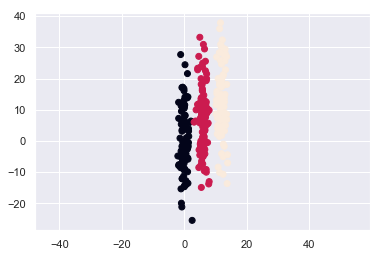

In [4]:
plt.scatter(vectores[:, 0], vectores[:, 1],c=colores)
plt.axes().set_aspect('equal', 'datalim')

In [5]:
centros = ct.get_random_centroids(vectores,k)

In [6]:
centros

array([[11.57413997, 15.04210831],
       [12.13512829,  4.73019389],
       [ 7.20019073, 21.49087547]])

In [7]:
movimiento = ct.looping_centroids(vectores, centros)

[[11.57413997 15.04210831]
 [12.13512829  4.73019389]
 [ 7.20019073 21.49087547]]
[[ 8.971084   13.09508512]
 [ 4.69933995 -0.93869685]
 [ 6.58186256 22.28947286]]
[[ 7.97767635 11.52317114]
 [ 3.78176614 -2.86772545]
 [ 8.12619634 24.5486675 ]]
[[ 7.33997917 10.51475489]
 [ 3.36565539 -4.25610547]
 [ 9.1121165  24.81040283]]
[[ 6.90782693  9.71172322]
 [ 3.28096454 -5.24917531]
 [ 9.32736861 24.2508983 ]]
[[ 6.80580123  9.48023708]
 [ 3.24884352 -5.64570418]
 [ 9.32736861 24.2508983 ]]
[[ 6.75110523  9.38646803]
 [ 3.25792584 -5.80715351]
 [ 9.32736861 24.2508983 ]]
[[ 6.69806198  9.29160431]
 [ 3.2670967  -5.96967901]
 [ 9.32736861 24.2508983 ]]
[[ 6.69806198  9.29160431]
 [ 3.2670967  -5.96967901]
 [ 9.32736861 24.2508983 ]]


In [9]:
len(movimiento)

9

In [32]:
for i in range(len(movimiento)):
    print(movimiento[i][:,1])

[ 9.29160431 -5.96967901 24.2508983 ]
[13.09508512 -0.93869685 22.28947286]
[11.52317114 -2.86772545 24.5486675 ]
[10.51475489 -4.25610547 24.81040283]
[ 9.71172322 -5.24917531 24.2508983 ]
[ 9.48023708 -5.64570418 24.2508983 ]
[ 9.38646803 -5.80715351 24.2508983 ]
[ 9.29160431 -5.96967901 24.2508983 ]
[ 9.29160431 -5.96967901 24.2508983 ]


In [10]:
resul = movimiento

In [11]:
lista = dict()
evens = [x for x in range(0,len(resul)*2,2)]
odds = [x for x in range((len(resul))*2) if x % 2 !=0]
coordenadas = list()

for i,res in enumerate(resul):
    lista['column'+str(evens[i])] = Column([resul[i][0][0], resul[i][1][0],resul[i][2][0]], 'x'+str(evens[i]))
    lista['column'+str(odds[i])] = Column([resul[i][0][1], resul[i][1][1],resul[i][2][1]], 'y'+str(odds[i]))
    coordenadas.append(('x'+str(evens[i]),'y'+str(odds[i])))

In [13]:
len(coordenadas)

9

In [39]:
grid = Grid(lista.values())
py.grid_ops.upload(grid,'testing_points'+str(time.time()),auto_open=False)

# create figure
trace = go.Scatter(
    x = vectores[:,0],
    y = vectores[:,1],
    mode = 'markers')

figure = {
    'data': [
        {
            'xsrc': grid.get_column_reference(coordenadas[0][0]),
            'ysrc': grid.get_column_reference(coordenadas[0][1]),
            'x':vectores[:,0],
            'y':vectores[:,1],
            'mode': 'markers',
            'marker': {'color': '#48186a', 'size': 10}
        }
    ],
    'layout': {'title': 'Growing Circles',
               'xaxis': {'range': [2, 10], 'autorange': False},
               'yaxis': {'range': [-10, 30], 'autorange': False},
               'updatemenus': [{
                   'buttons': [
                       {'args': [None],
                        'label': 'Play',
                        'method': 'animate'}
               ],
               'pad': {'r': 10, 't': 87},
               'showactive': False,
               'type': 'buttons'
                }]},
    'frames': [
        {
            'data': [
                {
                    'xsrc': grid.get_column_reference(coordenadas[1][0]),
                    'ysrc': grid.get_column_reference(coordenadas[1][1]),
                    'mode': 'markers',
                    'marker': {'color': '#3b528b', 'size': 10}
                }
            ]
        },
        {
            'data': [
                {
                    'xsrc': grid.get_column_reference(coordenadas[2][0]),
                    'ysrc': grid.get_column_reference(coordenadas[2][1]),
                    'mode': 'markers',
                    'marker': {'color': '#26828e', 'size': 10}
                }
            ]
        },
        {
            'data': [
                {
                    'xsrc': grid.get_column_reference(coordenadas[3][0]),
                    'ysrc': grid.get_column_reference(coordenadas[3][1]),
                    'mode': 'markers',
                    'marker': {'color': '#5ec962', 'size': 10}
                }
            ]
        },
        {
            'data': [
                {
                    'xsrc': grid.get_column_reference(coordenadas[4][0]),
                    'ysrc': grid.get_column_reference(coordenadas[4][1]),
                    'mode': 'markers',
                    'marker': {'color': '#d8e219', 'size': 10}
                }
            ]
        },
        {
            'data': [
                {
                    'xsrc': grid.get_column_reference(coordenadas[5][0]),
                    'ysrc': grid.get_column_reference(coordenadas[5][1]),
                    'mode': 'markers',
                    'marker': {'color': '#d8e219', 'size': 10}
                }
            ]
        },
        {
            'data': [
                {
                    'xsrc': grid.get_column_reference(coordenadas[6][0]),
                    'ysrc': grid.get_column_reference(coordenadas[6][1]),
                    'mode': 'markers',
                    'marker': {'color': '#d8e219', 'size': 10}
                }
            ]
        },
        {
            'data': [
                {
                    'xsrc': grid.get_column_reference(coordenadas[7][0]),
                    'ysrc': grid.get_column_reference(coordenadas[7][1]),
                    'mode': 'markers',
                    'marker': {'color': '#d8e219', 'size': 10}
                }
            ]
        },
        {
            'data': [
                {
                    'xsrc': grid.get_column_reference(coordenadas[8][0]),
                    'ysrc': grid.get_column_reference(coordenadas[8][1]),
                    'mode': 'markers',
                    'marker': {'color': '#d8e219', 'size': 10}
                }
            ]
        }
        
    ]
}
datos = [trace]
py.icreate_animations(figure, 'points_changing_size'+str(time.time()))
#py.iplot(datos, filename='basic-scatter')

PlotlyRequestError: Figure field is invalid. Reason: Raw data arrays are not allowed at this endpoint. Use grid references instead. Raw data found at the following paths in the figure [('data', 0, u'x'), ('data', 0, u'y')]

In [37]:
trace = go.Scatter(
    x = vectores[:,0],
    y = vectores[:,1],
    mode = 'markers')
data = [trace]
py.iplot(data, filename='basic-scatter')

In [ ]:
{
            'data': [
                {
                    'xsrc': grid.get_column_reference(coordenadas[9][0]),
                    'ysrc': grid.get_column_reference(coordenadas[9][1]),
                    'mode': 'markers',
                    'marker': {'color': '#d8e219', 'size': 10}
                }
            ]
        },
        {
            'data': [
                {
                    'xsrc': grid.get_column_reference(coordenadas[10][0]),
                    'ysrc': grid.get_column_reference(coordenadas[10][1]),
                    'mode': 'markers',
                    'marker': {'color': '#d8e219', 'size': 10}
                }
            ]
        },
        {
            'data': [
                {
                    'xsrc': grid.get_column_reference(coordenadas[11][0]),
                    'ysrc': grid.get_column_reference(coordenadas[11][1]),
                    'mode': 'markers',
                    'marker': {'color': '#d8e219', 'size': 10}
                }
            ]
        },
        {
            'data': [
                {
                    'xsrc': grid.get_column_reference(coordenadas[12][0]),
                    'ysrc': grid.get_column_reference(coordenadas[12][1]),
                    'mode': 'markers',
                    'marker': {'color': '#d8e219', 'size': 10}
                }
            ]
        },
        {
            'data': [
                {
                    'xsrc': grid.get_column_reference(coordenadas[13][0]),
                    'ysrc': grid.get_column_reference(coordenadas[13][1]),
                    'mode': 'markers',
                    'marker': {'color': '#d8e219', 'size': 10}
                }
            ]
        },
        {
            'data': [
                {
                    'xsrc': grid.get_column_reference(coordenadas[14][0]),
                    'ysrc': grid.get_column_reference(coordenadas[14][1]),
                    'mode': 'markers',
                    'marker': {'color': '#d8e219', 'size': 10}
                }
            ]
        }

In [ ]:
gridi.get_column_reference(coordenadas[1][0])

In [1]:
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
from IPython.display import display, HTML
import matplotlib.pyplot as plt


py.sign_in('mscandizzo', 'QA6ByvcoBJcWk7H0NAUi')

import centroids as ct

In [6]:
vectores, colores , k = ct.create_sample()

In [7]:
centros = ct.get_random_centroids(vectores,k)

In [8]:
movimiento = ct.looping_centroids(vectores, centros)

[[12.14856679  7.20337078]
 [11.69467759 11.17119087]
 [11.36573669 24.88173331]]
[[ 4.5763884  -0.94853538]
 [ 7.5630765  13.11822952]
 [ 9.27386986 23.21830471]]
[[ 3.72943442 -2.45155705]
 [ 7.65845354 11.70657067]
 [10.27675153 23.40410243]]
[[ 3.35604014 -3.30704181]
 [ 7.57917019 10.75340989]
 [10.1703879  23.28609694]]
[[ 3.21369633 -3.97665642]
 [ 7.34398249 10.05787173]
 [10.03831502 22.88842532]]
[[ 3.13350968 -4.56141208]
 [ 6.94609709  9.10445419]
 [ 9.96934197 21.71106096]]
[[ 2.87000567 -4.90594441]
 [ 6.8686596   8.1530331 ]
 [ 9.70635801 20.71020777]]
[[ 2.79435073 -5.37028264]
 [ 6.70279199  7.51634851]
 [ 9.51347443 20.34081307]]
[[ 2.71331394 -5.95048051]
 [ 6.51969065  6.87913259]
 [ 9.32649573 19.94917919]]
[[ 2.74474024 -6.19293291]
 [ 6.39908834  6.59133077]
 [ 9.23218137 19.71751483]]
[[ 2.55720806 -6.70656358]
 [ 6.33072291  6.20423154]
 [ 9.19500083 19.64082034]]
[[ 2.50000151 -6.94801279]
 [ 6.28316675  6.06955525]
 [ 9.19500083 19.64082034]]
[[ 2.50879789 -7

In [32]:
init_notebook_mode(connected=True)


data=[dict( x = vectores[:,0],
            y = vectores[:,1],
            mode='markers', 
           line=dict(width=2, color='blue')
          )]
      
layout=dict(title='Kinematic Generation of a Planar Curve', hovermode='closest',
            updatemenus= [{'type': 'buttons',
                           'buttons': [{'label': 'Play',
                                        'method': 'animate',
                                        'args': [None]}]}])

frames=[dict(data=[dict(x=[movimiento[k][:,0]], 
                        y=[movimiento[k][:,1]], 
                        mode='markers', 
                        marker=dict(color='red', size=30)
                        )
                  ]) for k in range(len(movimiento))]    



figure1=dict(data=data , layout=layout,frames=frames)          
py.iplot(figure1)